# POC - Find face in pictures

Context is using public member of French gouvernment. And try to find them into the a picture with all ministers.

 # Step 1 : Find face encoding for some members (Castaner, Philippe, Mahjoubi)

In [3]:
import face_recognition as FaceRec
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.
data = [('Edouard-Philippe.jpg', 'Edouard Philippe'),
        ("mounir-mahjoubi.jpg", "Mounir Mahjoubi"),
        ("christophe-castaner.jpg", "Christophe Castaner")]

# Load a sample pictures and learn how to recognize it
# And Create arrays of known face encodings and their names
known_face_encodings = [FaceRec.face_encodings(FaceRec.load_image_file(el[0]))[0] for el in data]
known_face_names = [el[1] for el in data]
print('Learned encoding for', len(known_face_encodings), 'images.')
print(np.array(known_face_encodings).shape)

Learned encoding for 3 images.
(3, 128)


# Step 2 : Find faces on target picture. And try to match them with the previous encoded faces

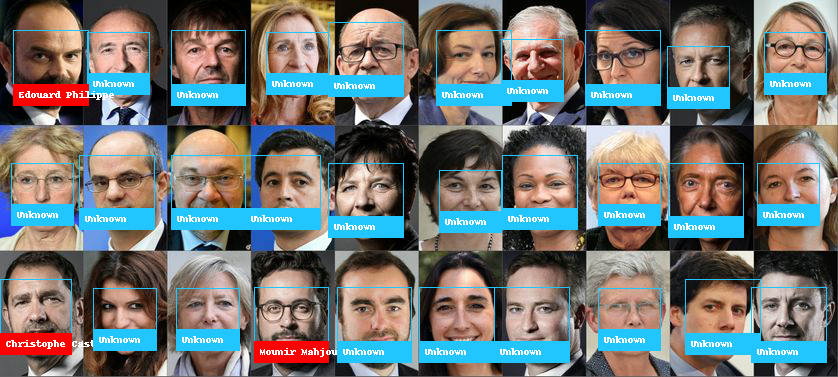

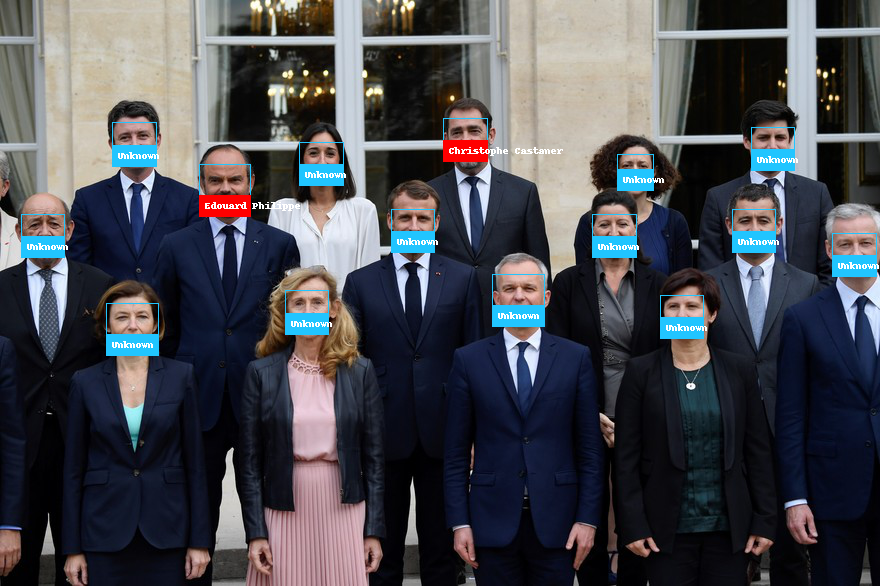

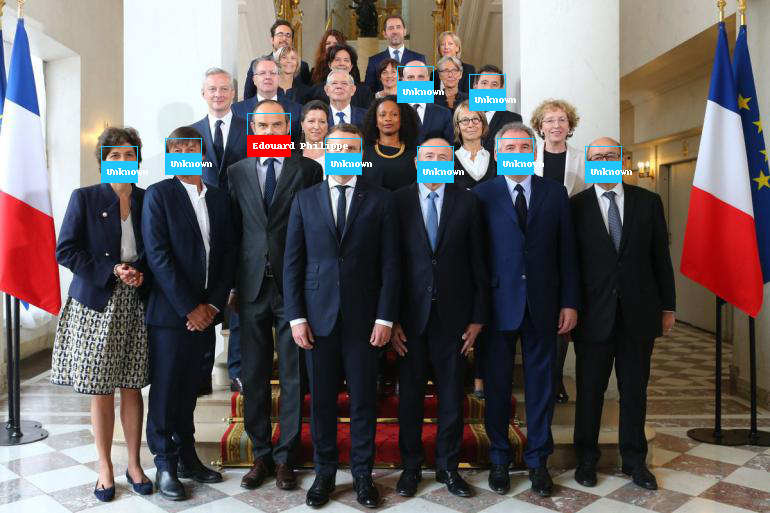

In [6]:
for path in ["gouvernement_macron.jpg", "gouvernement_macron2.jpg", "gouvernement_macron3.jpg"]:
    # Load an image with an unknown face
    unknown_image = FaceRec.load_image_file(path)
    # Find all the faces and face encodings in the unknown image
    face_locations = FaceRec.face_locations(unknown_image)
    face_encodings = FaceRec.face_encodings(unknown_image, face_locations)
    
    # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
    # See http://pillow.readthedocs.io/ for more about PIL/Pillow
    pil_image = Image.fromarray(unknown_image)
    # Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)
    
    # Loop through each face found in the unknown image
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = FaceRec.compare_faces(known_face_encodings, face_encoding)
    
        name = "Unknown"
        bgColorName = (33, 197, 255, 255)
        
        # Or instead, use the known face with the smallest distance to the new face
        face_distances = FaceRec.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            bgColorName = (255, 0, 0, 255)
    
        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(33, 197, 255, 255))
    
        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(name)
        draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=bgColorName, outline=bgColorName)
        draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))
    
    
    # Remove the drawing library from memory as per the Pillow docs
    del draw
    
    # Display the resulting image
    display(pil_image)